                                                    Polynomial Regression using randeom 150 observations/values                                                 

In [8]:
#Ploynomial features:
#Converts the input variable x into polynomial terms like x, x^2, x^3 etc.
# This allows us to model curved relationships(Polynomial Regression)

# r2_score:
# Evaluation metric that tells how well the model fits the data
# higher R² means the model explains the data better

# Pipeline:
# Helps combine multiple steps (PloynomialFeatures + LineraRegression) into a single workflow making the code simpler and cleaner

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline



In [4]:
X= 6*np.random.rand(150,1)-3
#We are generating synthetic (artificial) data to demonstrate PR
# X represents input features
# 6*np.random(150,1) generates 150 random values between 0 and 6
# Subtracting 3shifts the range to btw -3 and +3
# So X contains 150 values in the range [-3 to 3]

y=0.8*X**2+0.9*X+2+np.random.randn(150,1)
# 0.8x² --> quadratic term (creates curve)
# 0.9x --> linear term
# 2 --> constant value (intercept)
# np.random.randn adds random noise to make the data look real-world(not prefect)

# y=0.8x^2 + 0.9x + 2

In [5]:
X

array([[-2.32379508],
       [-0.21652906],
       [ 0.24243561],
       [-1.59428968],
       [ 0.21517643],
       [ 0.84273148],
       [ 0.53752286],
       [ 0.48307545],
       [ 1.70010052],
       [ 0.90744646],
       [-2.90616396],
       [-0.03758445],
       [-1.58067198],
       [-2.40510214],
       [ 0.52963457],
       [-0.85400565],
       [ 1.71450063],
       [ 1.51784723],
       [-2.54605896],
       [-1.50883796],
       [ 2.10915184],
       [ 2.90530576],
       [ 0.27457692],
       [ 1.78994835],
       [ 2.38455592],
       [ 1.58472369],
       [ 0.62831125],
       [ 0.99062507],
       [-1.13518231],
       [ 0.05647328],
       [ 0.26593807],
       [ 2.53401049],
       [ 0.09770597],
       [ 1.38282794],
       [ 0.00388519],
       [-2.49554643],
       [ 2.28958607],
       [ 2.93276599],
       [ 2.52201929],
       [ 1.46059759],
       [ 2.8585532 ],
       [ 1.1377906 ],
       [ 0.19453053],
       [ 0.33074901],
       [ 0.15778436],
       [ 1

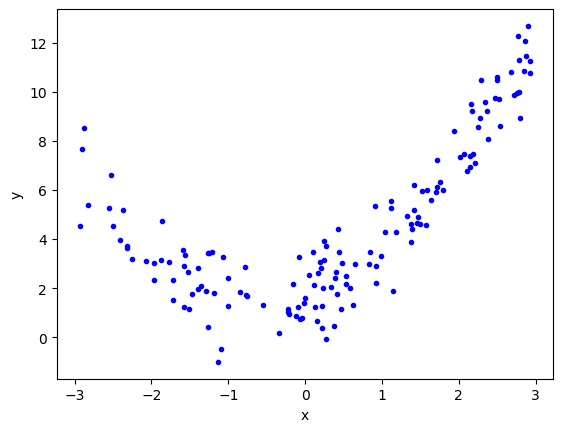

In [6]:
plt.plot(X,y,'b.')
# We are plotting the generated (X,y) data points
# 'b.' means blue colored dots
# This creates a scatter plot of x vs y values
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [9]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
lr=LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
from sklearn.metrics import r2_score
y_pred=lr.predict(X_test)
r2_score(y_test, y_pred)

0.49223420351223457

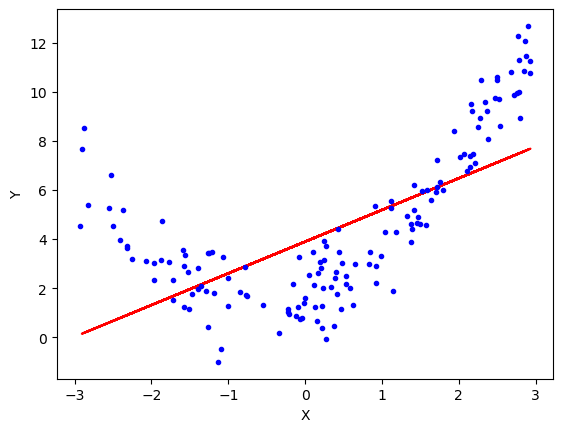

In [13]:
plt.plot(X_train, lr.predict(X_train),color='r')
# lr.predict(X_train) gives predicted y values using the trained LR model.
# plt.plot(X_train, lr.predict(X_train),color='r')
# This draws the ***regression line*** int the **red** to show the model's fit
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [14]:
#applying Polynomial linear regression

poly=PolynomialFeatures(degree=2,include_bias=True)
# PolynomialFeatures(degree=2)
# This creates new features based on x
# For degree=2, the features become:
# [1,x,x²]
# So instead of just x, the model can learn curved relationships

X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [17]:
print(X_train[0])
print(X_train_trans[0])

[0.27457692]
[1.         0.27457692 0.07539248]


In [18]:
#include bias parameter

In [19]:
lr=LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [20]:
y_pred=(lr.predict(X_test_trans))
y_pred

array([[ 8.23088384],
       [ 5.26989921],
       [ 1.97195495],
       [11.52358151],
       [ 2.078772  ],
       [ 9.70381664],
       [ 7.82585937],
       [ 2.84271154],
       [ 4.28709372],
       [ 5.55818616],
       [ 2.22166964],
       [ 2.56889599],
       [ 8.43608037],
       [ 3.27298256],
       [ 2.43438287],
       [11.96836697],
       [ 2.37187011],
       [ 3.73643091],
       [ 7.40046956],
       [11.05390265],
       [ 1.78934975],
       [ 3.44207283],
       [ 2.64392819],
       [ 5.34835261],
       [ 2.23772297],
       [ 6.82955152],
       [ 1.96592388],
       [ 3.20115103],
       [ 3.83820119],
       [ 2.03466934]])

In [21]:
r2_score(y_test,y_pred)

0.8761401570296368

In [22]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.88355474 0.89208622]]
[1.73660744]


In [23]:
# X_new:
# We are creating 150 evenly spaced x-values btw -3 and +3
# This range matched our original dataset (which generates btw -3 and 3)
X_new=np.linspace(-3,3,150).reshape(150,1)
X_new_poly=poly.transform(X_new)
y_new=lr.predict(X_new_poly)

In [24]:
"""
Purpose X_new:
To draw a smooth curve of the polynomial regression line
Explanation ---->>>> Your training data X is random and scattered---if we try to plot model predictiond only on X_train , the curve will look broken/uneven
"""

'\nPurpose X_new:\nTo draw a smooth curve of the polynomial regression line\nExplanation ---->>>> Your training data X is random and scattered---if we try to plot model predictiond only on X_train , the curve will look broken/uneven\n'

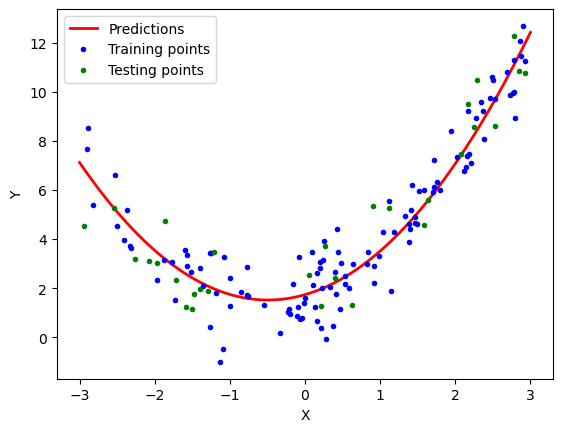

In [26]:
plt.plot(X_new, y_new,"r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train,"b.",label="Training points")
plt.plot(X_test,y_test,"g.",label="Testing points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()